# Data Crunch

Items worked on in chunks

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml

In [79]:
def config():
    with open('settings/config.yml') as config_fp:
        config = yaml.safe_load(config_fp)
    return config

Chose item

In [87]:
conf = config()

def datafetch():
    try:
        items = {str(k):i for k, i in enumerate(list(conf['spaced']))}
        for key, item in items.items():
            print(f"{key}: {item}", end=", ")
    except TypeError:
        print("Error: You have no data in the config file")
        return
    if len(items.keys()) == 1:
        cur = '0'
    else:
        print()
        while True:
            cur = input('')
            if cur in items.keys():
                break
            print(f"Please try again, {cur} isn't a valid option")
    data = conf['spaced'][items[cur]]
    print(f"goal: {data['goal']}")
    if data['book']:
        print(f"Working from {data['book']} by {', '.join(data['authors'])}")
    df = pd.read_csv(f"data/{data['data']}", sep='|', index_col='line')
    df['date'] = pd.to_datetime(df['date'])
    print()
    return df
    
    
df = datafetch()
df.head()

0: precalculus, goal: Complete the precalculus textbook by my next birthday
Working from Precalculus, Mathematics for Calculus by Stewart, Redlin, Watson



,date,achieved,target
line,,,
1,2021-12-22,44,49
2,2021-12-23,44,54
3,2021-12-24,44,59
4,2021-12-25,44,64
5,2021-12-26,44,69


In [86]:
df.tail()

,date,achieved,target
line,,,
192,01/07/2022,44,932
193,02/07/2022,44,937
194,03/07/2022,44,942
195,04/07/2022,44,946
196,05/07/2022,44,946


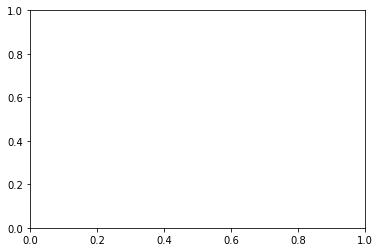

In [58]:
# Plot where I'm at
%matplotlib inline
fig, ax = plt.subplots()
_ = ax.plot(df.achieved)